In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-foundations-sign-language-detection/sample_submission.csv
/kaggle/input/ai-foundations-sign-language-detection/train.csv
/kaggle/input/ai-foundations-sign-language-detection/test.csv


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('/kaggle/input/ai-foundations-sign-language-detection/train.csv')

print(df)

       label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          3     107     118     127     134     139     143     146     150   
1          6     155     157     156     156     156     157     156     158   
2          2     187     188     188     187     187     186     187     188   
3          2     211     211     212     212     211     210     211     210   
4         13     164     167     170     172     176     179     180     184   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
27450     13     189     189     190     190     192     193     193     193   
27451     23     151     154     157     158     160     161     163     164   
27452     18     174     174     174     174     174     175     175     174   
27453     17     177     181     184     185     187     189     190     191   
27454     23     179     180     180     180     182     181     182     183   

       pixel9  ...  pixel775  pixel776 

In [4]:
y_train=np.array(df['label'])
num_uni=len(np.unique(y_train))
print(num_uni,np.unique(y_train))
X_train=df.iloc[:,1:785].to_numpy()
print(X_train,X_train.shape)
print(y_train)
X_train=X_train.reshape(27455,28,28)
print(X_train,X_train.shape)

24 [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
[[107 118 127 ... 204 203 202]
 [155 157 156 ... 103 135 149]
 [187 188 188 ... 195 194 195]
 ...
 [174 174 174 ... 202 200 200]
 [177 181 184 ...  64  87  93]
 [179 180 180 ... 205 209 215]] (27455, 784)
[ 3  6  2 ... 18 17 23]
[[[107 118 127 ... 170 170 169]
  [111 121 129 ... 171 171 170]
  [113 123 131 ... 171 171 171]
  ...
  [142 150 159 ... 202 201 200]
  [142 151 160 ... 204 203 202]
  [142 151 160 ... 204 203 202]]

 [[155 157 156 ... 138  92 108]
  [158 159 159 ... 142 116 143]
  [161 161 161 ... 147 125 140]
  ...
  [162 159 145 ...  91 101  94]
  [153 139 115 ...  97  95 120]
  [135 116  95 ... 103 135 149]]

 [[187 188 188 ...  66  77  83]
  [188 189 189 ...  73  73  71]
  [190 190 190 ...  74  68  61]
  ...
  [212 198 175 ... 195 193 192]
  [202 179 152 ... 195 194 193]
  [198 166 132 ... 195 194 195]]

 ...

 [[174 174 174 ... 160 158 156]
  [178 178 177 ... 162 160 158]
  [181 180 180 ... 164 1

Label:{} 3


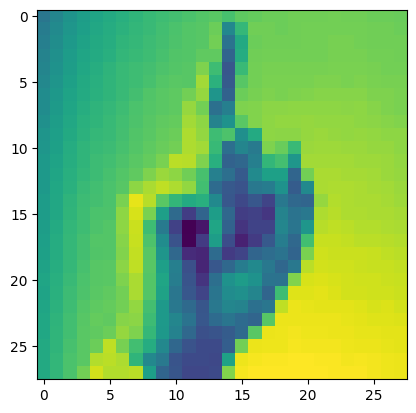

In [5]:
#lets visulaise the image with its label
print("Label:{}",format(y_train[0]))
plt.imshow(X_train[0])
plt.show()

In [6]:
#hot encoding the y_train
y_train=tf.keras.utils.to_categorical(y_train,25)
print(y_train.shape)

(27455, 25)


In [7]:
X_train=X_train.reshape(27455,28,28,1)

In [8]:
X_train=X_train.astype('float32')/255 #normalising the pixel values
print(X_train)


[[[[0.41960785]
   [0.4627451 ]
   [0.49803922]
   ...
   [0.6666667 ]
   [0.6666667 ]
   [0.6627451 ]]

  [[0.43529412]
   [0.4745098 ]
   [0.5058824 ]
   ...
   [0.67058825]
   [0.67058825]
   [0.6666667 ]]

  [[0.44313726]
   [0.48235294]
   [0.5137255 ]
   ...
   [0.67058825]
   [0.67058825]
   [0.67058825]]

  ...

  [[0.5568628 ]
   [0.5882353 ]
   [0.62352943]
   ...
   [0.7921569 ]
   [0.7882353 ]
   [0.78431374]]

  [[0.5568628 ]
   [0.5921569 ]
   [0.627451  ]
   ...
   [0.8       ]
   [0.79607844]
   [0.7921569 ]]

  [[0.5568628 ]
   [0.5921569 ]
   [0.627451  ]
   ...
   [0.8       ]
   [0.79607844]
   [0.7921569 ]]]


 [[[0.60784316]
   [0.6156863 ]
   [0.6117647 ]
   ...
   [0.5411765 ]
   [0.36078432]
   [0.42352942]]

  [[0.61960787]
   [0.62352943]
   [0.62352943]
   ...
   [0.5568628 ]
   [0.45490196]
   [0.56078434]]

  [[0.6313726 ]
   [0.6313726 ]
   [0.6313726 ]
   ...
   [0.5764706 ]
   [0.49019608]
   [0.54901963]]

  ...

  [[0.63529414]
   [0.62352943]
   [0.5

In [9]:
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(25,activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
data_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
data_generator.fit(X_train)

In [12]:
model.fit(X_train,y_train,epochs=10,batch_size=32)
model.fit(
    data_generator.flow(X_train,y_train,batch_size=32),
    epochs=12
)

Epoch 1/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.5318 - loss: 1.6119
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.9893 - loss: 0.0528
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.9990 - loss: 0.0093
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.9999 - loss: 0.0027
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.9941 - loss: 0.0205
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 1.0000 - loss: 4.4552e-04
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 1.0000 - loss: 1.9877e-04
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 1.0000 - loss: 1.3167e-04
Epoch 9/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 1.0000 - loss: 8.0196e-05
Epoch 10/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.9930 - loss: 0.0224
Epoch 1/12
  4/858 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.1803 - loss: 10.3093  

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


858/858 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.1768 - loss: 2.9811
Epoch 2/12
858/858 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.4637 - loss: 1.7029
Epoch 3/12
858/858 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.5691 - loss: 1.3281
Epoch 4/12
858/858 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.6461 - loss: 1.0928
Epoch 5/12
858/858 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.6900 - loss: 0.9439
Epoch 6/12
858/858 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.7277 - loss: 0.8366
Epoch 7/12
858/858 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.7667 - loss: 0.7246
Epoch 8/12
858/858 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.7861 - loss: 0.6542
Epoch 9/12
858/858 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.8105 - loss: 0.5803
Epoch 10/12
858/858 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.8188 - loss: 0.5461
Epoch 11/12
858/858 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.8387 - loss: 0.4854
Epoch 12/12
858/858 ━━━━━━━━━━━━━━━━━━━━ 

In [13]:
test_df=pd.read_csv('/kaggle/input/ai-foundations-sign-language-detection/test.csv')
print(test_df)

        id  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0        0     149     149     150     150     150     151     151     150   
1        1     126     128     131     132     133     134     135     135   
2        2      85      88      92      96     105     123     135     143   
3        3     203     205     207     206     207     209     210     209   
4        4     188     191     193     195     199     201     202     203   
...    ...     ...     ...     ...     ...     ...     ...     ...     ...   
7167  7167     135     119     108     102     105      99      61     103   
7168  7168     157     159     161     164     166     166     171     174   
7169  7169     190     191     190     191     190     190     192     192   
7170  7170     201     205     208     209     214     216     218     223   
7171  7171     173     174     173     174     173     173     175     175   

      pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixe

In [14]:
X_test=test_df.iloc[:,1:785].to_numpy()
print(X_test,X_test.shape)
X_test=X_test.reshape(7172,28,28,1)


[[149 149 150 ... 112 120 107]
 [126 128 131 ... 184 182 180]
 [ 85  88  92 ... 225 224 222]
 ...
 [190 191 190 ... 211 209 208]
 [201 205 208 ...  67  70  63]
 [173 174 173 ... 195 193 192]] (7172, 784)


In [15]:
X_test=X_test/255.0
print(X_test.shape)

(7172, 28, 28, 1)


In [16]:
y_pred_prob=model.predict(X_test)
y_pred=np.argmax(y_pred_prob,axis=1)

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [17]:
print(y_pred)

[ 6  5 10 ...  2  4  2]


In [18]:
id=np.array(test_df['id'])


In [19]:
result={
    "id":id,
     "label":y_pred
}
final_result=pd.DataFrame(result)
final_result

,id,label
0,0,6
1,1,5
2,2,10
3,3,0
4,4,3
...,...,...
7167,7167,1
7168,7168,12
7169,7169,2
7170,7170,4


In [20]:
final_result.to_csv('sign_language7.csv',index=False)

In [21]:
from IPython.display import FileLink
FileLink('/kaggle/working/sign_language.csv')


/kaggle/working/sign_language.csv